<a href="https://colab.research.google.com/github/ipevendelin/Nonlinear-Dimensionality-Reduction/blob/main/first_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# 1. Load and Prepare Data

In [6]:
# Load the Bike Sharing dataset
# Download from: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
# You can use either day.csv or hour.csv
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

# For this example, we'll load the daily data
# You may need to adjust the path after downloading
df = pd.read_csv('day.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

# Select features for analysis (excluding date, casual, registered as they're related to target)
feature_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
                'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

X = df[feature_cols].values
y = df['cnt'].values  # Target: total count of rental bikes

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features (important for PCA and t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset shape: (731, 16)

First few rows:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1

In [5]:
import requests
import zipfile
import os

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
zip_file_name = "Bike-Sharing-Dataset.zip"
extracted_dir_name = "Bike-Sharing-Dataset"
csv_file_name = "day.csv"

# Download the zip file
print(f"Downloading {zip_file_name}...")
response = requests.get(url)
if response.status_code == 200:
    with open(zip_file_name, 'wb') as f:
        f.write(response.content)
    print("Download complete.")

    # Extract the specified CSV file
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        # Check if the specific file exists in the zip archive
        if csv_file_name in zip_ref.namelist():
            print(f"Extracting {csv_file_name}...")
            zip_ref.extract(csv_file_name)
            print("Extraction complete.")
        else:
            print(f"Error: {csv_file_name} not found in the zip archive.")

    # Clean up the downloaded zip file
    # os.remove(zip_file_name)
    # print(f"Removed downloaded zip file: {zip_file_name}")

else:
    print(f"Error downloading file. Status code: {response.status_code}")

Download complete.
Extracting day.csv...
Extraction complete.


# 2. Apply Dimensionality Reduction

In [7]:
print("\n" + "="*70)
print("APPLYING DIMENSIONALITY REDUCTION TECHNIQUES")
print("="*70)

# --- PCA ---
print("\nApplying PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Show feature importance in principal components
pca_components_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_cols
)
print("\nPCA Components (feature loadings):")
print(pca_components_df)

# --- t-SNE ---
print("\nApplying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
print("t-SNE completed")


APPLYING DIMENSIONALITY REDUCTION TECHNIQUES

Applying PCA...
PCA explained variance ratio: [0.24316611 0.1541743 ]
Total variance explained: 0.3973

PCA Components (feature loadings):
                 PC1       PC2
season      0.472722  0.124392
yr          0.011198 -0.175689
mnth        0.427368  0.186735
holiday    -0.025568 -0.028252
weekday    -0.007354 -0.003601
workingday  0.043318  0.038809
weathersit  0.026519  0.616233
temp        0.481491 -0.328679
atemp       0.487803 -0.321506
hum         0.239078  0.561361
windspeed  -0.252061 -0.101033

Applying t-SNE...
t-SNE completed


# 3. Visualize Dimensionality Reduction Results


CREATING VISUALIZATIONS


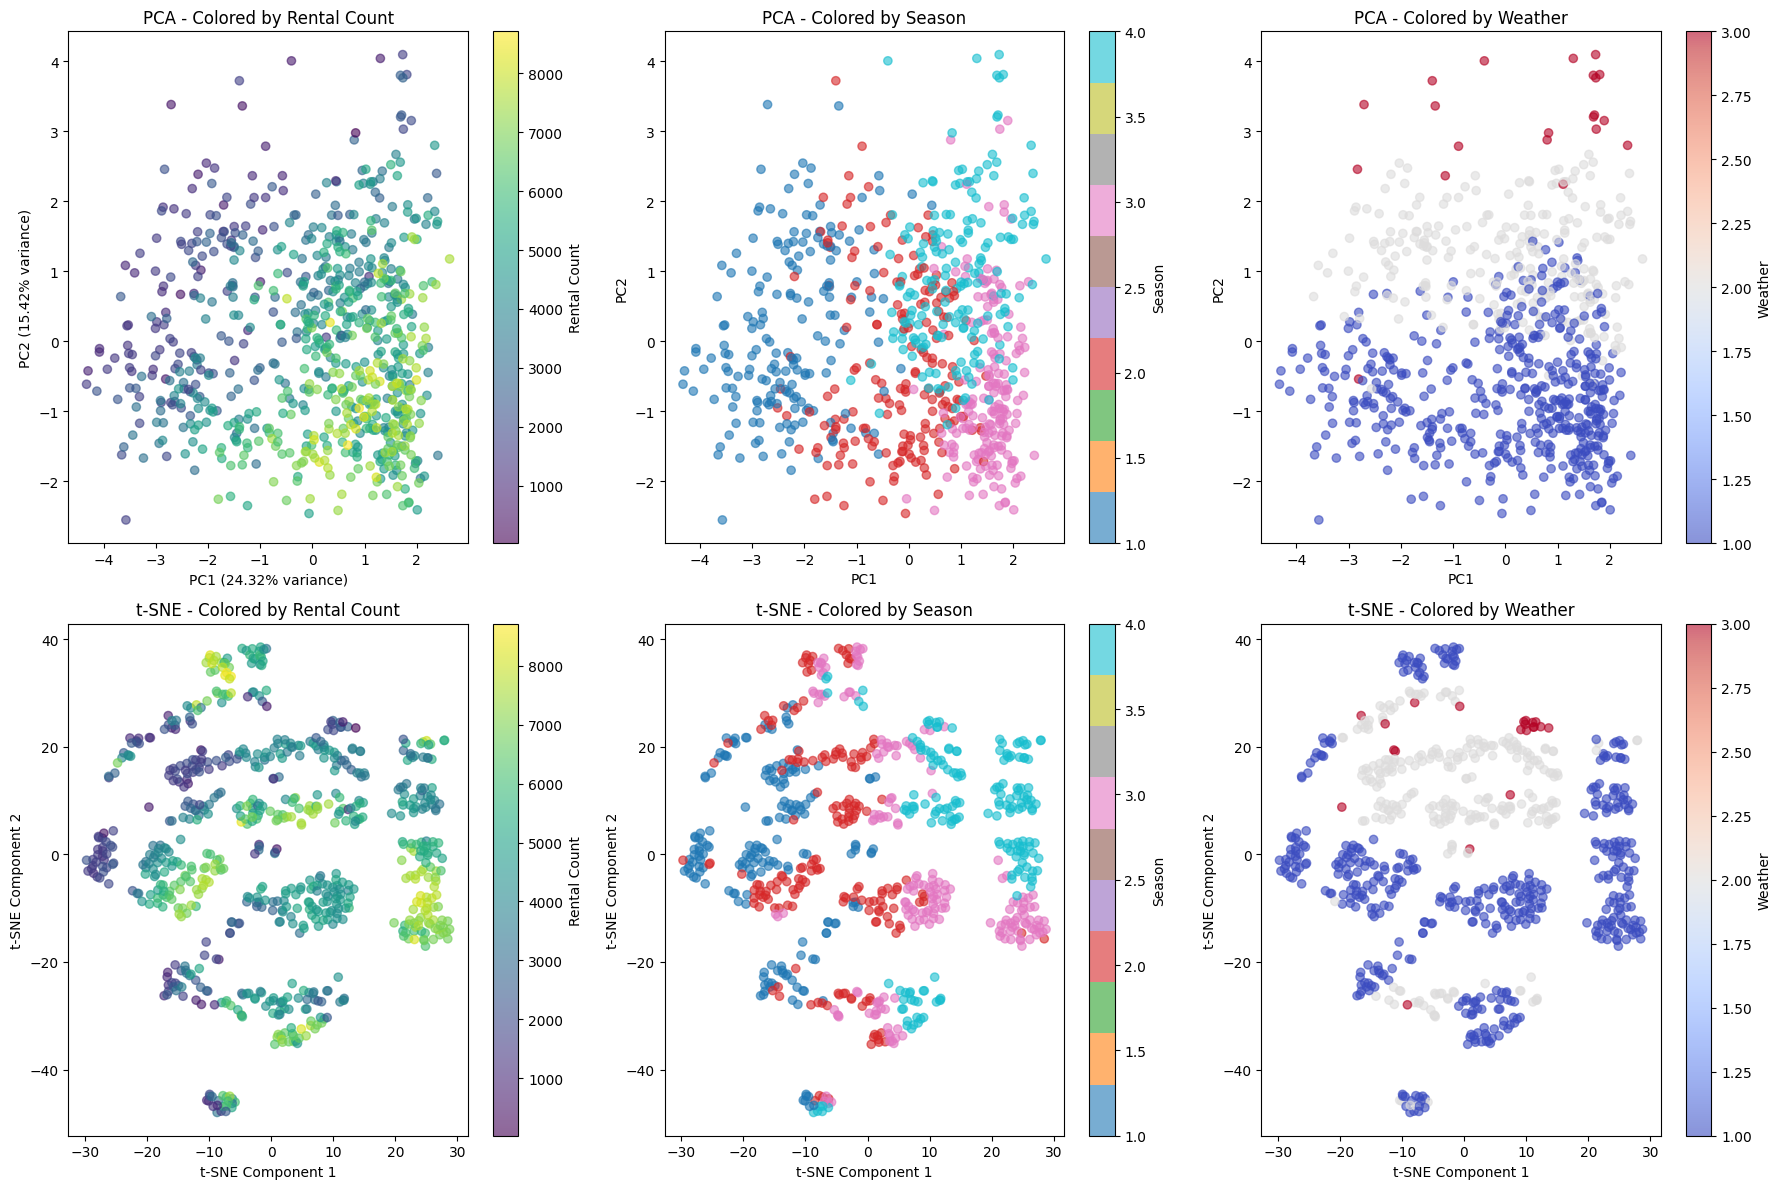

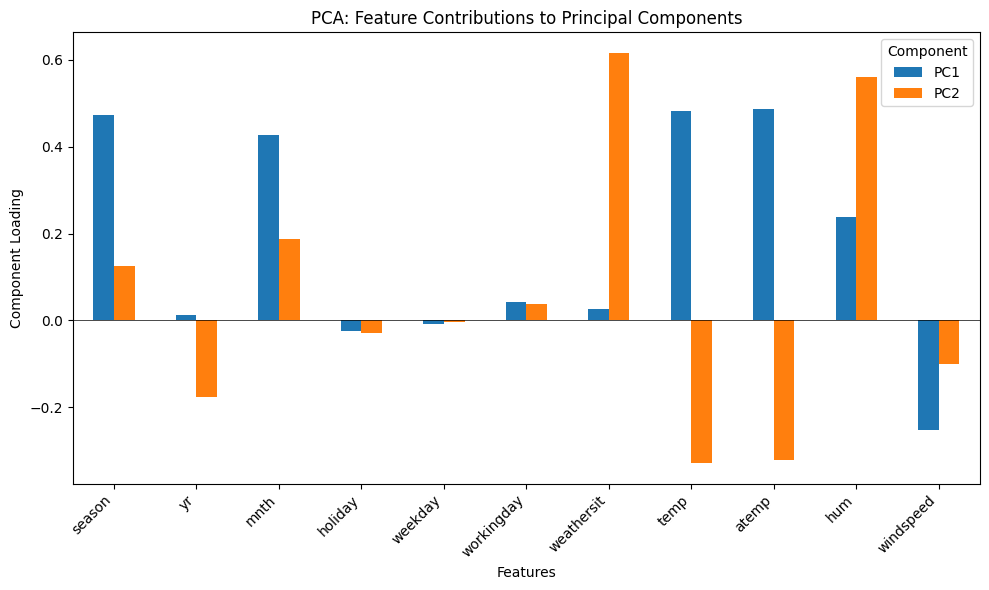

In [8]:
print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# PCA visualizations
scatter1 = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0, 0].set_title('PCA - Colored by Rental Count')
plt.colorbar(scatter1, ax=axes[0, 0], label='Rental Count')

# PCA by season
scatter2 = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=df['season'], cmap='tab10', alpha=0.6)
axes[0, 1].set_xlabel(f'PC1')
axes[0, 1].set_ylabel(f'PC2')
axes[0, 1].set_title('PCA - Colored by Season')
plt.colorbar(scatter2, ax=axes[0, 1], label='Season')

# PCA by weather
scatter3 = axes[0, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=df['weathersit'], cmap='coolwarm', alpha=0.6)
axes[0, 2].set_xlabel(f'PC1')
axes[0, 2].set_ylabel(f'PC2')
axes[0, 2].set_title('PCA - Colored by Weather')
plt.colorbar(scatter3, ax=axes[0, 2], label='Weather')

# t-SNE visualizations
scatter4 = axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('t-SNE Component 1')
axes[1, 0].set_ylabel('t-SNE Component 2')
axes[1, 0].set_title('t-SNE - Colored by Rental Count')
plt.colorbar(scatter4, ax=axes[1, 0], label='Rental Count')

# t-SNE by season
scatter5 = axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['season'], cmap='tab10', alpha=0.6)
axes[1, 1].set_xlabel('t-SNE Component 1')
axes[1, 1].set_ylabel('t-SNE Component 2')
axes[1, 1].set_title('t-SNE - Colored by Season')
plt.colorbar(scatter5, ax=axes[1, 1], label='Season')

# t-SNE by weather
scatter6 = axes[1, 2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['weathersit'], cmap='coolwarm', alpha=0.6)
axes[1, 2].set_xlabel('t-SNE Component 1')
axes[1, 2].set_ylabel('t-SNE Component 2')
axes[1, 2].set_title('t-SNE - Colored by Weather')
plt.colorbar(scatter6, ax=axes[1, 2], label='Weather')

plt.tight_layout()
plt.savefig('pca_vs_tsne_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance visualization for PCA
fig, ax = plt.subplots(figsize=(10, 6))
pca_components_df.plot(kind='bar', ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Component Loading')
ax.set_title('PCA: Feature Contributions to Principal Components')
ax.legend(title='Component')
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pca_feature_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Build Prediction Models

In [9]:
print("\n" + "="*70)
print("BUILDING AND EVALUATING PREDICTION MODELS")
print("="*70)

# Split data for all three scenarios
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# For PCA
X_train_pca, X_test_pca = train_test_split(
    X_pca, test_size=0.2, random_state=42
)

# For t-SNE (not typically used for prediction, but for comparison)
X_train_tsne, X_test_tsne = train_test_split(
    X_tsne, test_size=0.2, random_state=42
)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  R²:   {r2:.4f}")

    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'predictions': y_pred}

# Dictionary to store results
results = {}

# ============================================================================
# Random Forest Models
# ============================================================================

print("\n--- RANDOM FOREST REGRESSOR ---")

rf_orig = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
results['RF_Original'] = evaluate_model(
    rf_orig, X_train_orig, X_test_orig, y_train, y_test,
    "Random Forest with Original Features"
)

rf_pca = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
results['RF_PCA'] = evaluate_model(
    rf_pca, X_train_pca, X_test_pca, y_train, y_test,
    "Random Forest with PCA Features"
)

rf_tsne = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
results['RF_tSNE'] = evaluate_model(
    rf_tsne, X_train_tsne, X_test_tsne, y_train, y_test,
    "Random Forest with t-SNE Features"
)

# ============================================================================
# MLP Models
# ============================================================================

print("\n--- MULTI-LAYER PERCEPTRON ---")

mlp_orig = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
results['MLP_Original'] = evaluate_model(
    mlp_orig, X_train_orig, X_test_orig, y_train, y_test,
    "MLP with Original Features"
)

mlp_pca = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
results['MLP_PCA'] = evaluate_model(
    mlp_pca, X_train_pca, X_test_pca, y_train, y_test,
    "MLP with PCA Features"
)

mlp_tsne = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
results['MLP_tSNE'] = evaluate_model(
    mlp_tsne, X_train_tsne, X_test_tsne, y_train, y_test,
    "MLP with t-SNE Features"
)


BUILDING AND EVALUATING PREDICTION MODELS

--- RANDOM FOREST REGRESSOR ---

Random Forest with Original Features:
  RMSE: 677.28
  MAE:  429.85
  R²:   0.8856

Random Forest with PCA Features:
  RMSE: 1278.21
  MAE:  1035.17
  R²:   0.5926

Random Forest with t-SNE Features:
  RMSE: 815.83
  MAE:  573.10
  R²:   0.8340

--- MULTI-LAYER PERCEPTRON ---

MLP with Original Features:
  RMSE: 845.15
  MAE:  625.19
  R²:   0.8219

MLP with PCA Features:
  RMSE: 1324.69
  MAE:  1075.77
  R²:   0.5624

MLP with t-SNE Features:
  RMSE: 1950.99
  MAE:  1554.01
  R²:   0.0508


# 5. Compare Results


PERFORMANCE COMPARISON

        Model        RMSE         MAE       R²
 RF_Original  677.278727  429.849388 0.885606
      RF_PCA 1278.212195 1035.170000 0.592550
     RF_tSNE  815.832187  573.102721 0.834015
MLP_Original  845.149927  625.186644 0.821870
     MLP_PCA 1324.694164 1075.767975 0.562378
    MLP_tSNE 1950.985136 1554.009888 0.050759


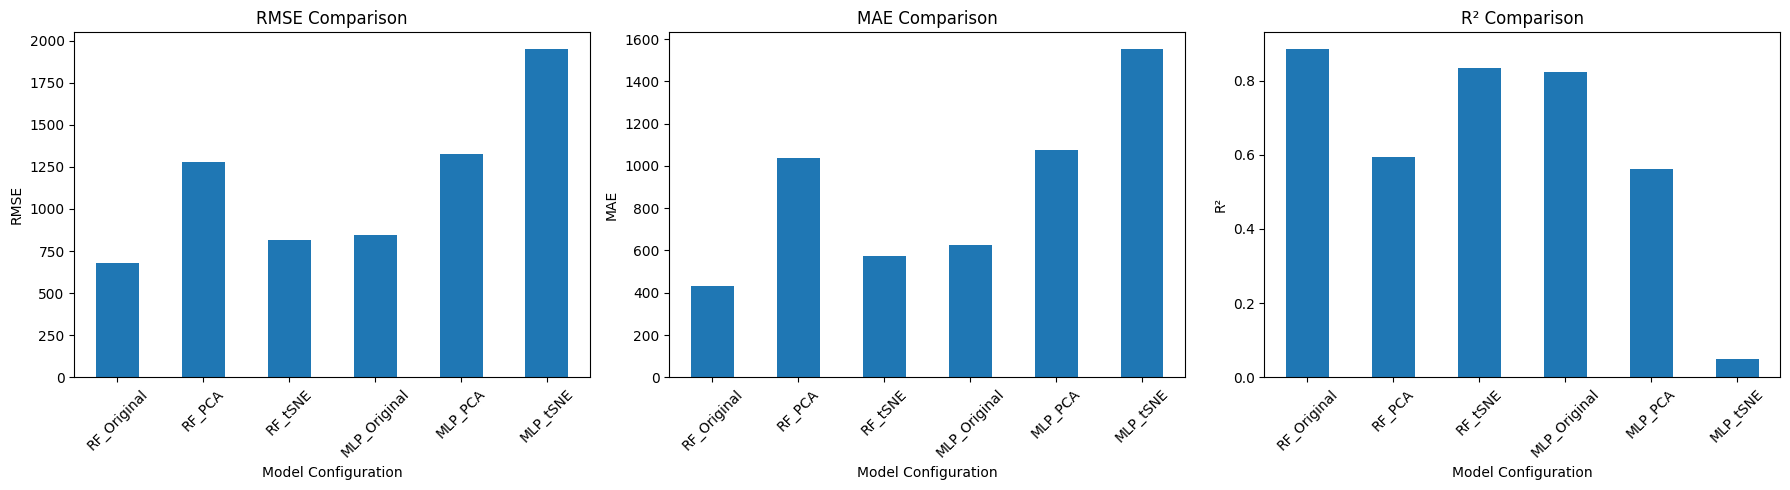

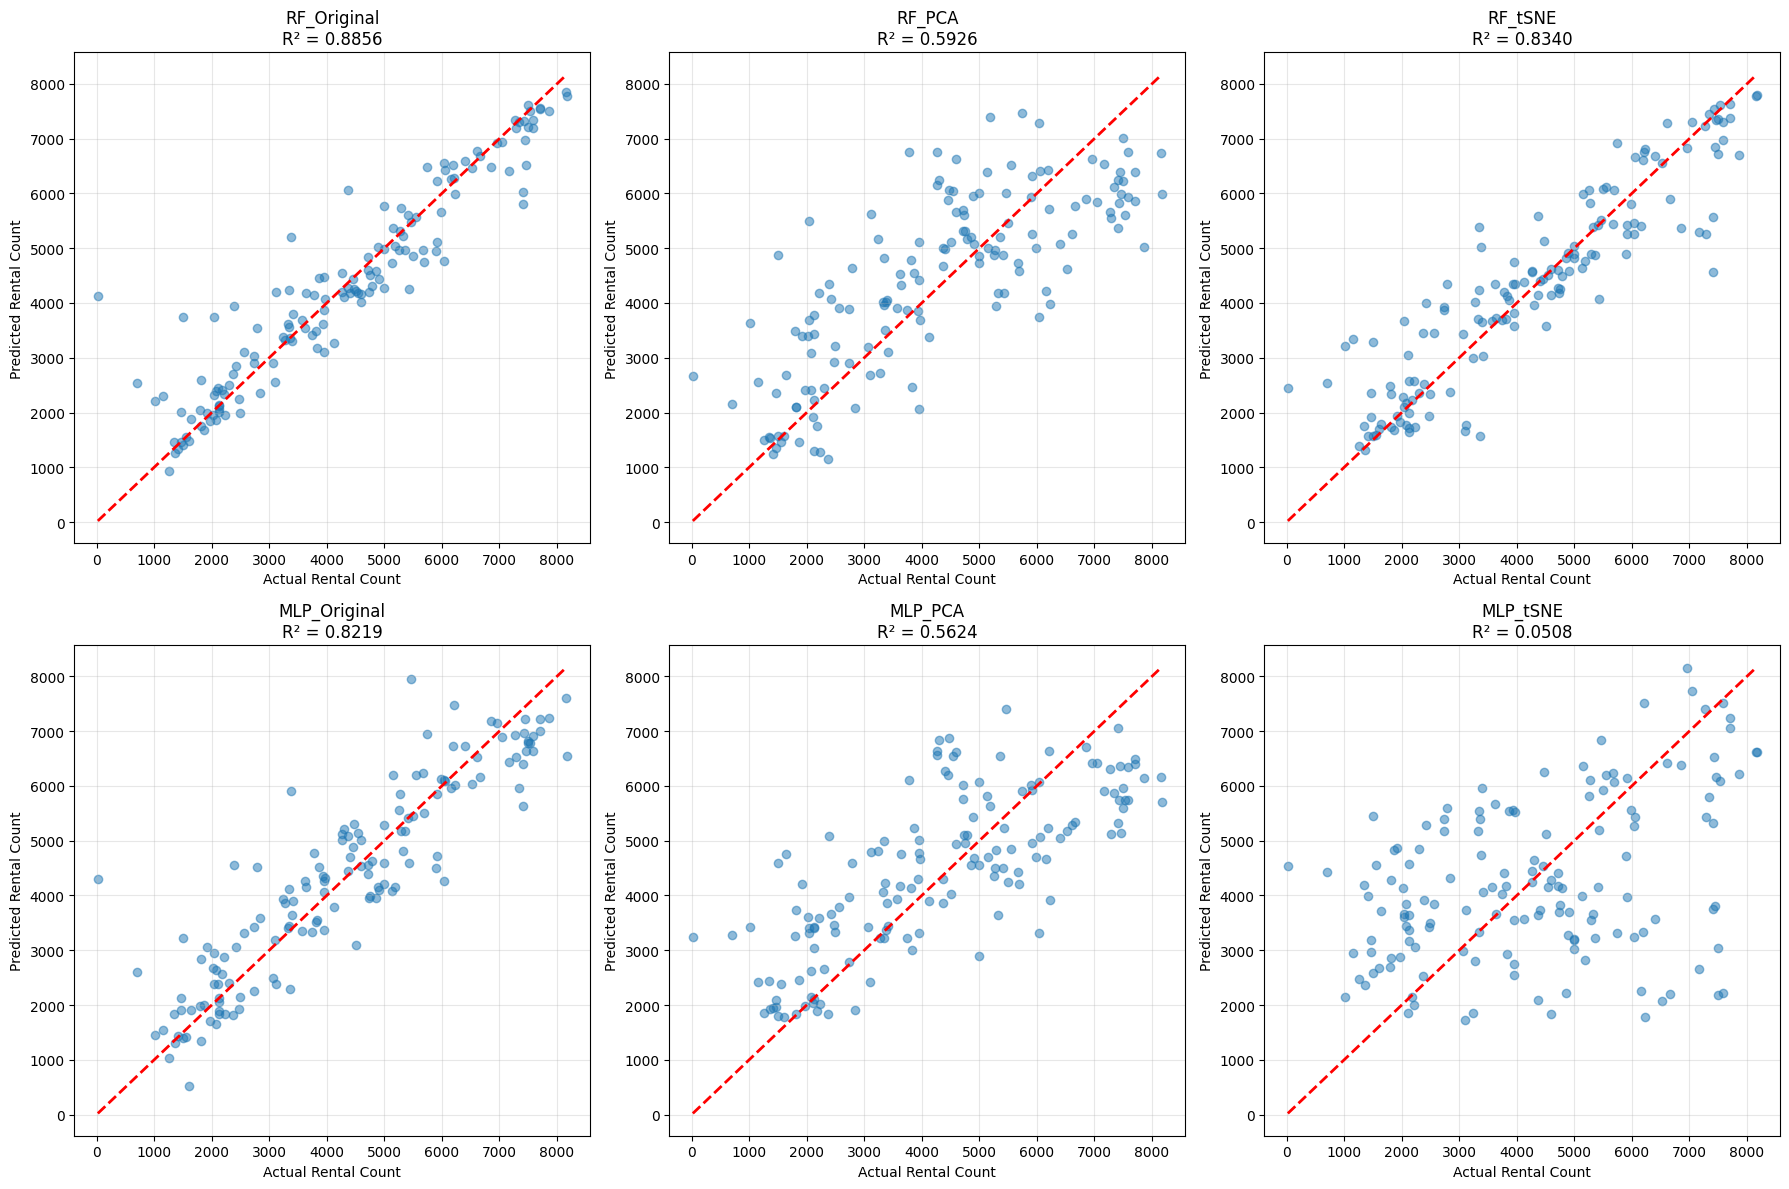


ANALYSIS COMPLETE

Key Findings:
1. Check which DR method preserved predictive information best
2. Compare visualization quality between PCA and t-SNE
3. Note that t-SNE is primarily for visualization, not prediction
4. PCA maintains global structure while t-SNE emphasizes local structure


In [10]:
print("\n" + "="*70)
print("PERFORMANCE COMPARISON")
print("="*70)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[k]['RMSE'] for k in results.keys()],
    'MAE': [results[k]['MAE'] for k in results.keys()],
    'R²': [results[k]['R2'] for k in results.keys()]
})

print("\n", comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['RMSE', 'MAE', 'R²']
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Model Configuration')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize predictions vs actual
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

model_names = list(results.keys())
for idx, model_name in enumerate(model_names):
    ax = axes[idx]
    predictions = results[model_name]['predictions']
    ax.scatter(y_test, predictions, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', lw=2)
    ax.set_xlabel('Actual Rental Count')
    ax.set_ylabel('Predicted Rental Count')
    ax.set_title(f'{model_name}\nR² = {results[model_name]["R2"]:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)
print("\nKey Findings:")
print("1. Check which DR method preserved predictive information best")
print("2. Compare visualization quality between PCA and t-SNE")
print("3. Note that t-SNE is primarily for visualization, not prediction")
print("4. PCA maintains global structure while t-SNE emphasizes local structure")